<a href="https://colab.research.google.com/github/leogoncalves/recinfo/blob/main/Trabalho_RecInfo_Anal%C3%ADse_de_sentimentos_dos_%C3%BAltimos_5_anos_das_Billboard_Hot_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [2]:
review_music_instruments_dataset = 'https://raw.githubusercontent.com/leogoncalves/recinfo/main/amazon_musical_instruments_review.csv'
dataframe = pd.read_csv(review_music_instruments_dataset, error_bad_lines = False)

# Remove null and empty values
dataframe = dataframe.dropna()

# Reset index
dataframe = dataframe.reset_index(drop=True)

# With near by 10k reviews, we need adjust type data
dataframe['helpful/0'] = dataframe['helpful/0'].astype(int)
dataframe['helpful/1'] = dataframe['helpful/1'].astype(int)
dataframe['overall'] = dataframe['overall'].astype(int)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


We need make a exploratory analysis from data before continue. We plot some graphs here.
The overall column has a 

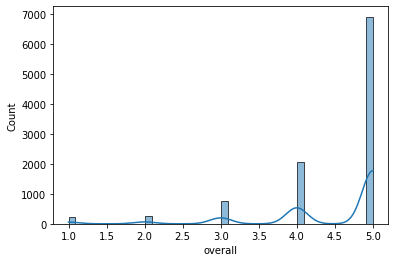

In [3]:
sns.histplot(data=dataframe.overall, kde=True)


The higher frequency of good reviews its clear. We proceed with adding a label to each point
1-2 stars: negative review
3 stars: neutral review
4-5 stars: positive review



In [4]:
# remove neutral reviews
dataframe = dataframe[dataframe['overall'] != 3]

# Create a label column. 
dataframe['label'] = np.where(dataframe['overall'] >= 4, 1, 0)

# Count ratings
dataframe['overall'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


5    6912
4    2079
2     249
1     216
Name: overall, dtype: int64

Positive reviews: 8991 (95.09%)

Negative Reviews: 464 (4.91%)

Total: 9455 (100%)


In [5]:
# Now we are creating the model by considering the 100000 reviews. In the 1,00,000 reviews 50,000 are positive and 50,000 are negative.
# I am shuffling the review as to take random 1,00,000 reviews from 16,07,094. You can ignore if you don’t want to shuffle.
# df = df.sample(frac=1).reset_index(drop=True) #shuffle
# data=df[df['label']==0][:50000]
# data=data.append(df[df['label']==1][:50000])
# data = data.reset_index(drop=True)
# display(data['label'].value_counts())
# data

Now we need clear text (remove html and transforme all words to lowercase)

In [12]:
# Convert text to lower case
dataframe['pre_process'] = dataframe['reviewText'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

# Remove html tags and urls
from bs4 import BeautifulSoup
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())

import re
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: re.sub(r"http+\S", "", x))

# Remove contractions from review

def contractions(sentence):
  s = sentence
  s = re.sub(r"won’t", "will not",s)
  s = re.sub(r"would’t", "would not",s)
  s = re.sub(r"could’t", "could not",s)
  s = re.sub(r"\’d", " would",s)
  s = re.sub(r"can\’t", "can not",s)
  s = re.sub(r"n\’t", " not", s)
  s= re.sub(r"\’re", " are", s)
  s = re.sub(r"\’s", " is", s)
  s = re.sub(r"\’ll", " will", s)
  s = re.sub(r"\’t", " not", s)
  s = re.sub(r"\’ve", " have", s)
  s = re.sub(r"\’m", " am", s)
  return s

dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: contractions(x))

# Remove non-alpha characters
nltk.download('punkt')
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: " ".join([re.sub(r'[^A-Za-z]+', '', x) for x in nltk.word_tokenize(x)]))

# Remove extra spaces
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

# Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in english_stopwords]))

# Apply lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
dataframe['pre_process'] = dataframe['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

dataframe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviewerID,asin,reviewerName,helpful/0,helpful/1,reviewText,overall,summary,unixReviewTime,reviewTime,label,pre_process
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0,0,"Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",1,much write exactly supposed filter pop sound r...
1,A14VAT5EAX3D9S,1384719342,Jake,13,14,The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",1,product exactly quite affordablei realized dou...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1,1,The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",1,primary job device block breath would otherwis...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0,0,Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1,nice windscreen protects mxl mic prevents pop ...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0,0,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",1,pop filter great look performs like studio fil...
...,...,...,...,...,...,...,...,...,...,...,...,...
10222,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,0,0,"Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",1,great expected thank
10223,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,0,0,I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",1,thinking trying nanoweb string bit put high pr...
10224,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,0,0,I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",1,tried coated string past including elixir neve...
10225,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""",0,0,"Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",1,well made elixir developed taylor guitar strin...


Now, we apply tf-idf on text. 

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(dataframe['pre_process'], dataframe['label'], test_size=0.25, random_state=30)

print("Train: ", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape, Y_test.shape)

print("TFIDF Vectorizer")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

clf.fit(tf_x_train,Y_train)
y_test_pred=clf.predict(tf_x_test)

from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

report

Train:  (7092,) (7092,)
Test:  (2364,) (2364,)
TFIDF Vectorizer


{'0': {'f1-score': 0.2377622377622378,
  'precision': 0.7727272727272727,
  'recall': 0.14049586776859505,
  'support': 121},
 '1': {'f1-score': 0.976226826608506,
  'precision': 0.955593509820666,
  'recall': 0.9977708426214891,
  'support': 2243},
 'accuracy': 0.9538917089678511,
 'macro avg': {'f1-score': 0.6069945321853719,
  'precision': 0.8641603912739694,
  'recall': 0.569133355195042,
  'support': 2364},
 'weighted avg': {'f1-score': 0.9384289352166285,
  'precision': 0.9462336051301836,
  'recall': 0.9538917089678511,
  'support': 2364}}

In [16]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')

clf.fit(tf_x_train,Y_train)
y_test_pred=clf.predict(tf_x_test)

from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 121},
 '1': {'f1-score': 0.9737356197091384,
  'precision': 0.9488155668358714,
  'recall': 1.0,
  'support': 2243},
 'accuracy': 0.9488155668358714,
 'macro avg': {'f1-score': 0.4868678098545692,
  'precision': 0.4744077834179357,
  'recall': 0.5,
  'support': 2364},
 'weighted avg': {'f1-score': 0.9238955139626047,
  'precision': 0.900250979870076,
  'recall': 0.9488155668358714,
  'support': 2364}}